# Solar Model
A notebook to analyze the solar data and produce a predictive model for install time

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [23]:
plt.style.use('seaborn-darkgrid')

Read in data

In [24]:
solar_data = pd.read_excel("solar_data.xlsx")

Select necessary columns

In [4]:
solar_data_selected_columns = solar_data[
    [
        "Number Panels",
        "BrightBox",
        "Service Panel Upgrade",
        "Miles to Installtion",
        "Standard Install Hours",
        "Additional SOW Hours"
    ]
].dropna(axis = 0, subset = ["Number Panels"])

In [5]:
len(solar_data_selected_columns)

1980

Format data

In [6]:
def num_panels_category(num_panels):
    if (num_panels < 14):
        return "small"
    elif (num_panels >= 14 and num_panels <= 24):
        return "medium"
    else:
        return "large"

In [26]:
solar_data_selected_columns["num_panels_category"] = solar_data_selected_columns["Number Panels"].map(num_panels_category)
solar_data_selected_columns["log_miles_to_install"] = solar_data_selected_columns["Miles to Installtion"].map(np.log10)
solar_data_selected_columns["ttl_hours"] = solar_data_selected_columns["Standard Install Hours"] +\
    solar_data_selected_columns["Additional SOW Hours"]
solar_data_selected_columns["service_panel_upgrade"] = solar_data_selected_columns["Service Panel Upgrade"].map(
    lambda x: 1 if x == 1 else 0)

Take a look at the first few rows

In [27]:
solar_data_selected_columns.head()

,Number Panels,BrightBox,Service Panel Upgrade,Miles to Installtion,Standard Install Hours,Additional SOW Hours,num_panels_category,ttl_hours,service_panel_upgrade,log_miles_to_install
0,25.0,0.0,NaN,23.443563,81.0,0.0,large,81.0,0,1.370024
1,27.0,0.0,NaN,30.577530,52.5,0.0,large,52.5,0,1.485402
2,22.0,0.0,NaN,29.683728,65.5,0.0,medium,65.5,0,1.472518
3,41.0,0.0,1.0,13.577014,227.5,17.5,large,245.0,1,1.132804
4,23.0,0.0,NaN,40.536463,72.0,0.0,medium,72.0,0,1.607846


Plot variables

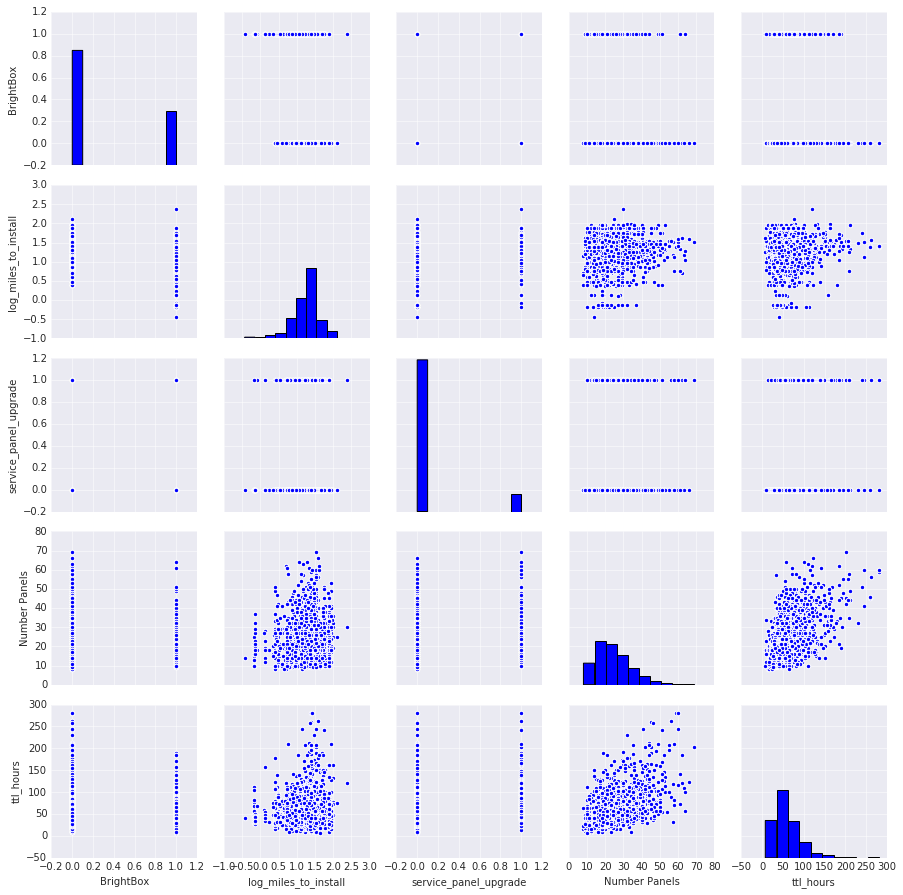

In [28]:
sns.pairplot(
    data = solar_data_selected_columns,
    # hue = "num_panels_category",
    vars = ["BrightBox", "log_miles_to_install", "service_panel_upgrade", "Number Panels", "ttl_hours"])